# 4. Data Preprocessing

## 4.1 Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 4.2 Import Cleaned Dataset

In [ ]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### 4.3 Train Test Split

In [ ]:
df.drop(['day','month','year'], axis=1, inplace=True)


In [ ]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [ ]:
X = df.drop('FWI',axis=1)
y= df['FWI']

In [ ]:

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 11), (61, 11))

## 4.4 FEATURE SELECTION 

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


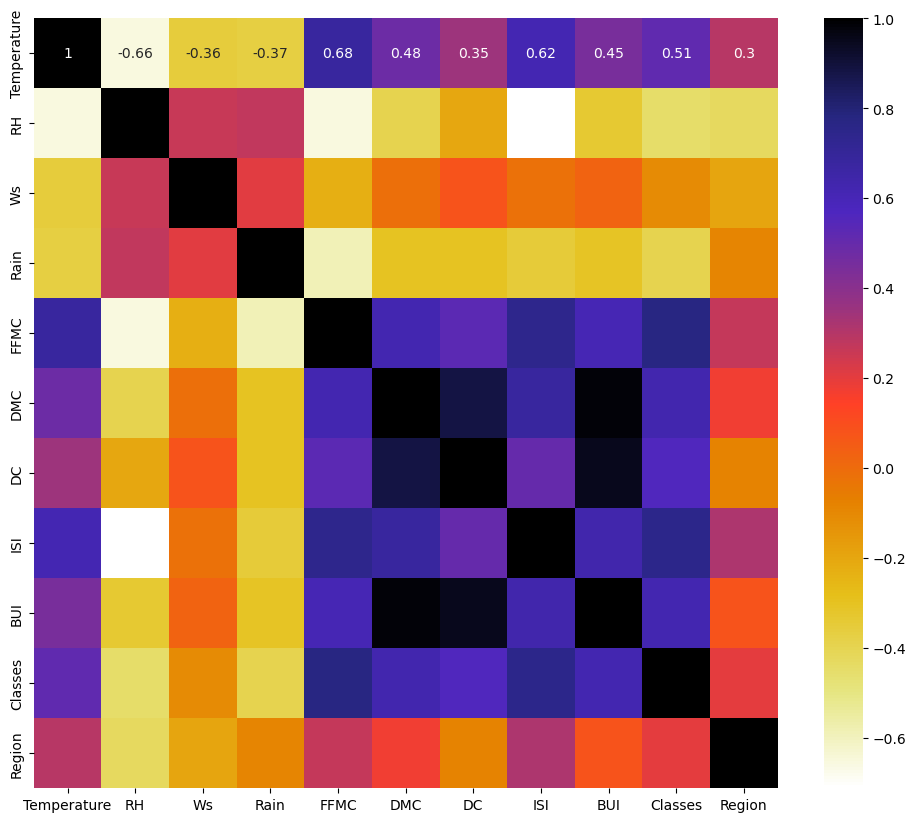

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)

In [ ]:
# features which has correlation more than 0.85
corr_features

{'BUI', 'DC'}

In [ ]:
# drop faures when corrleation is more than 0.85
X_train.drop(corr_features,axis = 1, inplace = True)
X_test.drop(corr_features,axis = 1, inplace = True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

 ## 4.5 FEATURE SCALING OR STANDARDIZATION 

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.89709937,
         0.88561489,  1.02222494],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.91779112,
        -1.12915898,  1.02222494],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  2.75736213,
         0.88561489,  1.02222494],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.57749915,
        -1.12915898, -0.97825827],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.1010904 ,
         0.88561489, -0.97825827],
       [-0.05893324, -0.86036737,  0.85443749, ...,  1.84991688,
         0.88561489,  1.02222494]])

Text(0.5, 1.0, 'X_train after scaling')

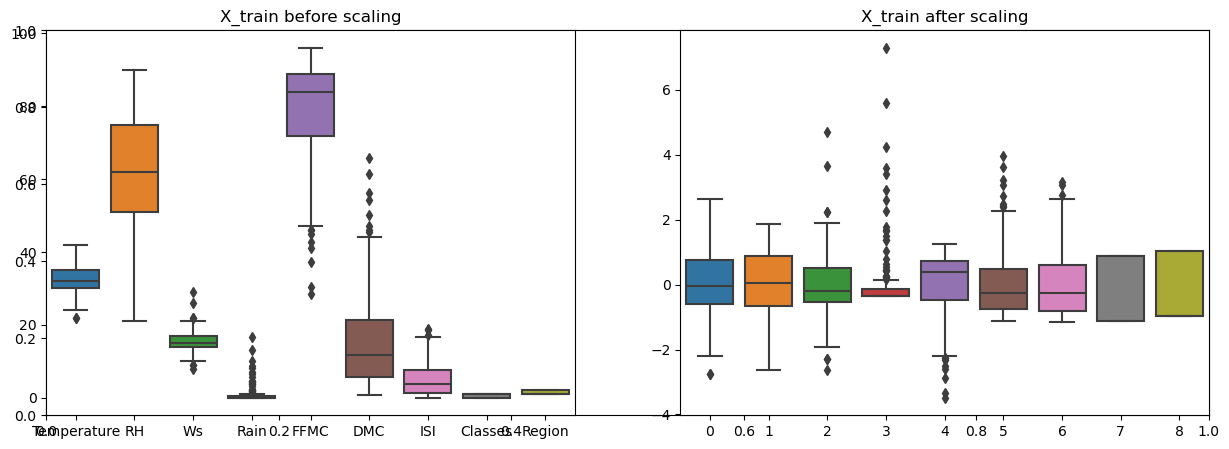

In [ ]:
# Box plot to undersatand effect of standard scaler 
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

# 5. Model Selection For Regression

## 5.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, r2_score

Linreg = LinearRegression()
Linreg.fit(X_train_scaled,y_train)
y_pred = Linreg.predict(X_test_scaled)

# checking accuracy 
mae = mean_absolute_error(y_test,y_pred) 
score = r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", score)

Mean absolute error:  0.6852784521674959
R2 score:  0.9703973266545679


## 5.2 Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

# checking accuracy 
mae = mean_absolute_error(y_test,y_pred) 
score = r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", score)

Mean absolute error:  1.1209175798372668
R2 score:  0.9376608745831527


## 5.3 Ridge Regression model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)

# checking accuracy 
mae = mean_absolute_error(y_test,y_pred) 
score = r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", score)

Mean absolute error:  0.7126268400578207
R2 score:  0.9692051022118807


## 5.4 Elasticent Regression 

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)

# checking accuracy 
mae = mean_absolute_error(y_test,y_pred) 
score = r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", score)

Mean absolute error:  1.8193555979007137
R2 score:  0.8575522912954434


In [ ]:
# Pickling
import pickle 
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl','wb'))